In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
data = pd.read_csv("/content/nyc_taxi_trip_duration.csv")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [28]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [29]:
data.shape

(729322, 11)

In [30]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [31]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [32]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [33]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [34]:

data[["id","store_and_fwd_flag"]] = data[["id","store_and_fwd_flag"]].astype('category')
data[["id","store_and_fwd_flag"]].dtypes

id                    category
store_and_fwd_flag    category
dtype: object

In [35]:
data.duplicated().sum()

0

In [36]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [37]:
data.isnull().sum().sum()

0

In [38]:
data[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',"store_and_fwd_flag",'trip_duration']].fillna(method='ffill', inplace= True)

<ipython-input-38-b1b3ca2871b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',"store_and_fwd_flag",'trip_duration']].fillna(method='ffill', inplace= True)


In [39]:
data.isnull().sum().sum()

0

In [40]:

# Convert pickup and dropoff datetime columns to datetime data type
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

# Extract components
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['pickup_week'] = data['pickup_datetime'].dt.isocalendar().week
data['pickup_month'] = data['pickup_datetime'].dt.month_name()
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute

data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()
data['dropoff_week'] = data['dropoff_datetime'].dt.isocalendar().week
data['dropoff_month'] = data['dropoff_datetime'].dt.month_name()
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_minute'] = data['dropoff_datetime'].dt.minute

# Extract time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['pickup_time_of_day'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_datetime'] = data['dropoff_hour'].apply(time_of_day)

# Display the resulting DataFrame
#print(data)


In [41]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_week,pickup_month,pickup_hour,pickup_minute,dropoff_day,dropoff_week,dropoff_month,dropoff_hour,dropoff_minute,pickup_time_of_day
0,id1080784,2,2016-02-29 16:40:21,Afternoon,1,-73.953918,40.778873,-73.963875,40.771164,N,...,9,February,16,40,Monday,9,February,16,47,Afternoon
1,id0889885,1,2016-03-11 23:35:37,Night,2,-73.988312,40.731743,-73.994751,40.694931,N,...,10,March,23,35,Friday,10,March,23,53,Night
2,id0857912,2,2016-02-21 17:59:33,Evening,2,-73.997314,40.721458,-73.948029,40.774918,N,...,7,February,17,59,Sunday,7,February,18,26,Evening
3,id3744273,2,2016-01-05 09:44:31,Morning,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,January,9,44,Tuesday,1,January,10,3,Morning
4,id0232939,1,2016-02-17 06:42:23,Morning,1,-74.017120,40.708469,-73.988182,40.740631,N,...,7,February,6,42,Wednesday,7,February,6,56,Morning


# Problem Definition:  Predicts the total ride duration of taxi trips in New York City


 Hypothesis Generation :
     1) Start datetime  -Time of Day Effect:
Hypothesis: Taxi trip durations vary based on the time of day.
Explanation: Trips during rush hours may take longer due to traffic congestion.

 Null Hypothesis (H0): The time of day has no significant effect on taxi trip duration.
 Alternative Hypothesis (H1): Taxi trip durations vary significantly based on the time of day.

                    - Day of the Week Effect:
 Hypothesis: Trip durations differ on different days of the week.
 Explanation: Weekdays may have longer durations due to work-related travel.

Null Hypothesis (H0): The day of the week has no significant effect on taxi trip duration.
Alternative Hypothesis (H1): Taxi trip durations differ significantly across different days of the week.

                -Weekend vs. Weekday Difference:
 Hypothesis: Weekend trip durations differ from weekdays.
 Explanation: More leisure travel may occur on weekends, affecting durations.

Null Hypothesis (H0): There is no significant difference in taxi trip durations between weekends and weekdays.
Alternative Hypothesis (H1): Taxi trip durations on weekends differ significantly from those on weekdays.

                       - Public Holidays:
 Hypothesis: Holidays have different ride duration patterns.
 Explanation: Holiday-related festivities or road closures can affect durations.

Null Hypothesis (H0): There is no significant difference in taxi trip durations on public holidays.
Alternative Hypothesis (H1): Taxi trip durations on public holidays differ from regular days.

 Distance between locations: Distance-Related Hypotheses:

Hypothesis: Longer distances result in longer trip durations.
Explanation: More ground to cover typically leads to longer trips.

Null Hypothesis (H0): The distance between locations does not significantly impact taxi trip duration.
Alternative Hypothesis (H1): Longer distances between locations result in longer taxi trip durations.

Descriptive Statistics:


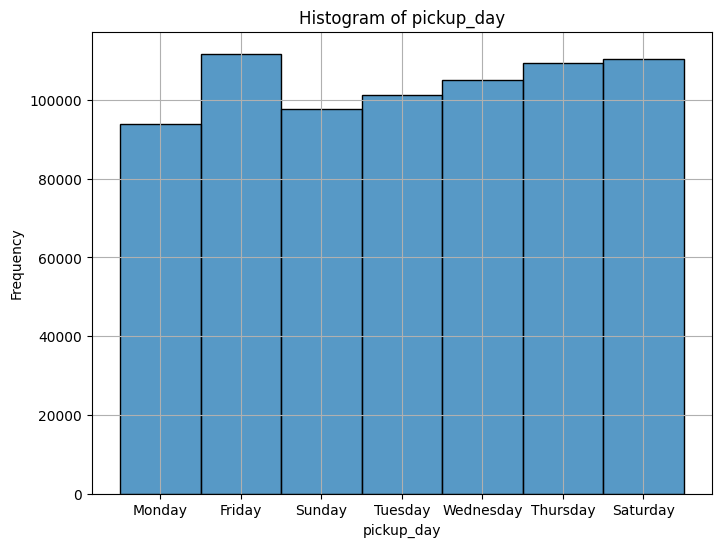

More Trips occurs on Fridays and less trips occurs on Mondays


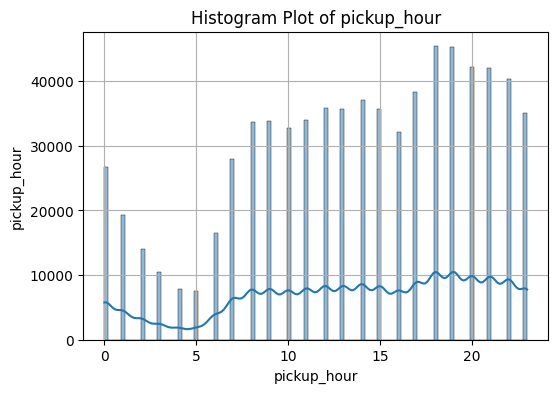

More trips occours during between 18:00 - 19:00(Evening) and less trips between 04:00 - 05:00 (Early Morning)


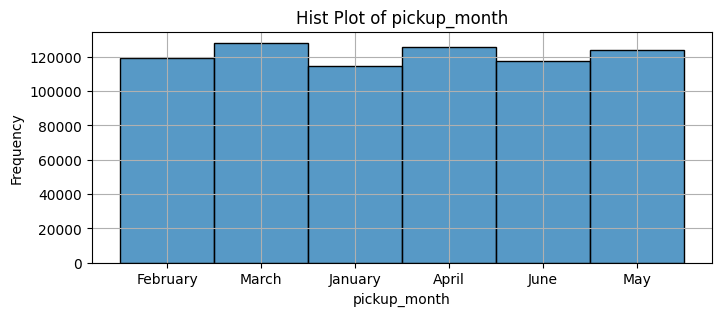

More trips occures during March and less trip during January


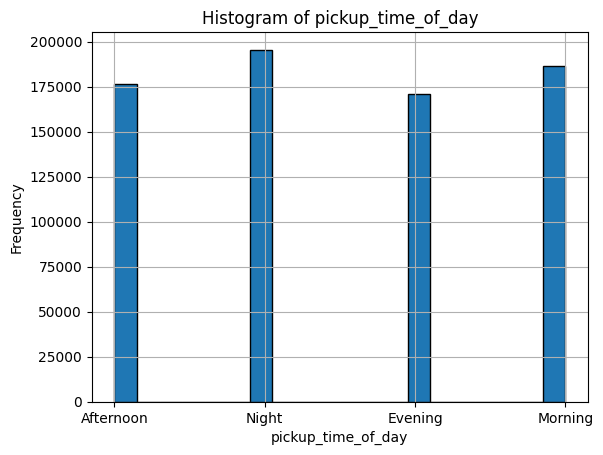

More trips occurs during the night(21:00-00:00) and less trip occurs during Evening(17:00-21:00)


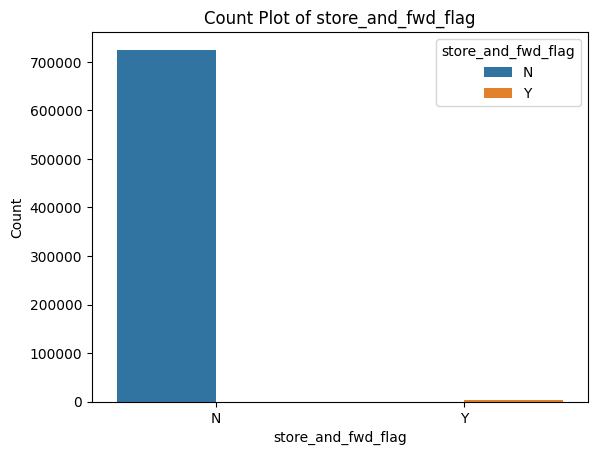

In [56]:

# Descriptive Statistics
print("Descriptive Statistics:")
#print(data.describe())

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['pickup_day'], bins=30)
plt.xlabel('pickup_day')
plt.ylabel('Frequency')
plt.title('Histogram of pickup_day')
plt.grid(True)
plt.show()
print("More Trips occurs on Fridays and less trips occurs on Mondays")
# More Trips occurs on Fridays and less trips occurs on Mondays

# Hist Plot
plt.figure(figsize=(6, 4))
sns.histplot(data['pickup_hour'], kde= True)
plt.ylabel('pickup_hour')
plt.title('Histogram Plot of pickup_hour')
plt.grid(True)
plt.show()
print("More trips occours during between 18:00 - 19:00(Evening) and less trips between 04:00 - 05:00 (Early Morning)")
# More trips occours during between 18:00 - 19:00(Evening) and less trips between 04:00 - 05:00 (Early Morning)

# Hist plot
plt.figure(figsize=(8, 3))
sns.histplot(data['pickup_month'])
plt.xlabel('pickup_month')
plt.ylabel('Frequency')
plt.title('Hist Plot of pickup_month')
plt.grid(True)
plt.show()
print("More trips occures during March and less trip during January")
# More trips occures during March and less trip during January

# Create a histogram
plt.hist(data['pickup_time_of_day'], bins=20, edgecolor='k')
plt.xlabel('pickup_time_of_day')
plt.ylabel('Frequency')
plt.title('Histogram of pickup_time_of_day')
plt.grid(True)
plt.show()
print("More trips occurs during the night(21:00-00:00) and less trip occurs during Evening(17:00-21:00)")
# More trips occurs during the night(21:00-00:00) and less trip occurs during Evening(17:00-21:00)

# create categorial variable 'store_and_fwd_flag'
sns.countplot(data=data, x='store_and_fwd_flag',hue='store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Count')
plt.title('Count Plot of store_and_fwd_flag')
plt.show()



In [43]:
from geopy.distance import great_circle
# Define a function to calculate the distance for each row
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(pickup_coords, dropoff_coords).kilometers, great_circle(pickup_coords, dropoff_coords).miles

# Apply the function to each row and create new columns for kilometers and miles
data['distance_km'], data['distance_miles'] = zip(*data.apply(calculate_distance, axis=1))

# Display the DataFrame with the calculated distances
#print(data)


In [44]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minute,dropoff_day,dropoff_week,dropoff_month,dropoff_hour,dropoff_minute,pickup_time_of_day,distance_km,distance_miles
0,id1080784,2,2016-02-29 16:40:21,Afternoon,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16,40,Monday,9,February,16,47,Afternoon,1.199074,0.745070
1,id0889885,1,2016-03-11 23:35:37,Night,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23,35,Friday,10,March,23,53,Night,4.129117,2.565714
2,id0857912,2,2016-02-21 17:59:33,Evening,2,-73.997314,40.721458,-73.948029,40.774918,N,...,17,59,Sunday,7,February,18,26,Evening,7.250763,4.505415
3,id3744273,2,2016-01-05 09:44:31,Morning,6,-73.961670,40.759720,-73.956779,40.780628,N,...,9,44,Tuesday,1,January,10,3,Morning,2.361101,1.467120
4,id0232939,1,2016-02-17 06:42:23,Morning,1,-74.017120,40.708469,-73.988182,40.740631,N,...,6,42,Wednesday,7,February,6,56,Morning,4.328540,2.689630


In [45]:
data['trip_duration'].head(2)

0     400
1    1100
Name: trip_duration, dtype: int64

In [46]:

# Convert the "trip_duration" column to a pandas Timedelta
data['duration'] = pd.to_timedelta(data['trip_duration'], unit='s')

# Extract duration per week (in seconds)
data['duration_per_week'] = data['duration'].dt.total_seconds() / (7 * 24 * 60 * 60)

# Extract duration per month (in seconds)
data['duration_per_month'] = data['duration'].dt.total_seconds() / (30 * 24 * 60 * 60)

# Print the result
#print(data)


In [47]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_week,dropoff_month,dropoff_hour,dropoff_minute,pickup_time_of_day,distance_km,distance_miles,duration,duration_per_week,duration_per_month
0,id1080784,2,2016-02-29 16:40:21,Afternoon,1,-73.953918,40.778873,-73.963875,40.771164,N,...,9,February,16,47,Afternoon,1.199074,0.745070,0 days 00:06:40,0.000661,0.000154
1,id0889885,1,2016-03-11 23:35:37,Night,2,-73.988312,40.731743,-73.994751,40.694931,N,...,10,March,23,53,Night,4.129117,2.565714,0 days 00:18:20,0.001819,0.000424
2,id0857912,2,2016-02-21 17:59:33,Evening,2,-73.997314,40.721458,-73.948029,40.774918,N,...,7,February,18,26,Evening,7.250763,4.505415,0 days 00:27:15,0.002703,0.000631
3,id3744273,2,2016-01-05 09:44:31,Morning,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,January,10,3,Morning,2.361101,1.467120,0 days 00:19:01,0.001887,0.000440
4,id0232939,1,2016-02-17 06:42:23,Morning,1,-74.017120,40.708469,-73.988182,40.740631,N,...,7,February,6,56,Morning,4.328540,2.689630,0 days 00:14:08,0.001402,0.000327


In [48]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_week,dropoff_month,dropoff_hour,dropoff_minute,pickup_time_of_day,distance_km,distance_miles,duration,duration_per_week,duration_per_month
729317,id3905982,2,2016-05-21 13:29:38,Afternoon,2,-73.965919,40.789780,-73.952637,40.789181,N,...,20,May,13,34,Afternoon,1.120225,0.696075,0 days 00:04:56,0.000489,0.000114
729318,id0102861,1,2016-02-22 00:43:11,Night,1,-73.996666,40.737434,-74.001320,40.731911,N,...,8,February,0,48,Night,0.728706,0.452797,0 days 00:05:15,0.000521,0.000122
729319,id0439699,1,2016-04-15 18:56:48,Evening,1,-73.997849,40.761696,-74.001488,40.741207,N,...,15,April,19,8,Evening,2.298779,1.428395,0 days 00:11:13,0.001113,0.000260
729320,id2078912,1,2016-06-19 09:50:47,Morning,1,-74.006706,40.708244,-74.013550,40.713814,N,...,24,June,9,58,Morning,0.846317,0.525877,0 days 00:07:27,0.000739,0.000172
729321,id1053441,2,2016-01-01 17:24:16,Evening,4,-74.003342,40.743839,-73.945847,40.712841,N,...,53,January,17,44,Evening,5.945846,3.694577,0 days 00:20:24,0.002024,0.000472


In [49]:
data.head(2).columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_week', 'pickup_month',
       'pickup_hour', 'pickup_minute', 'dropoff_day', 'dropoff_week',
       'dropoff_month', 'dropoff_hour', 'dropoff_minute', 'pickup_time_of_day',
       'distance_km', 'distance_miles', 'duration', 'duration_per_week',
       'duration_per_month'],
      dtype='object')

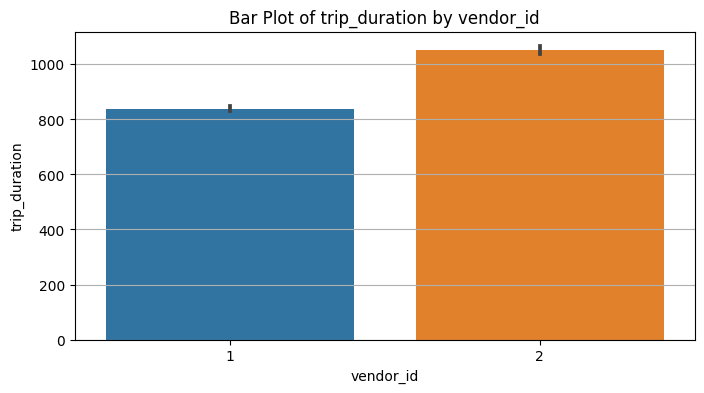

Vendor 2 ('V2') appears to have slightly longer trip durations on average compared to Vendor 1 ('V1').


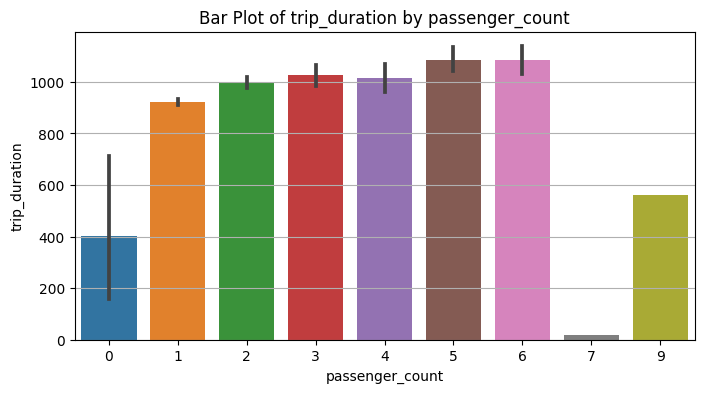

Trips with 5 passengers seem to have the longest average duration, followed by 6 passengers.


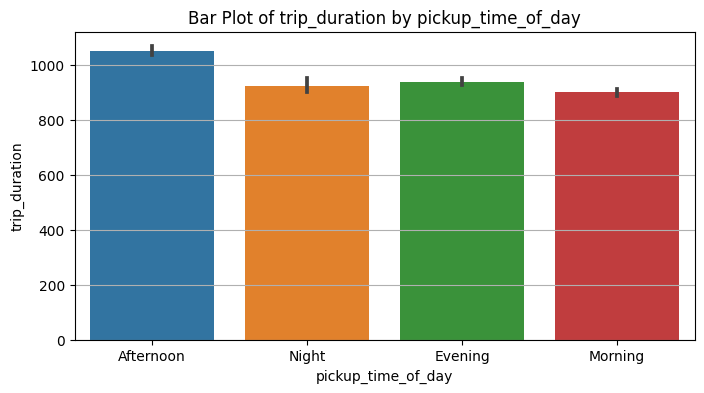

Trips during the afternoon hours tend to have longer average durations.


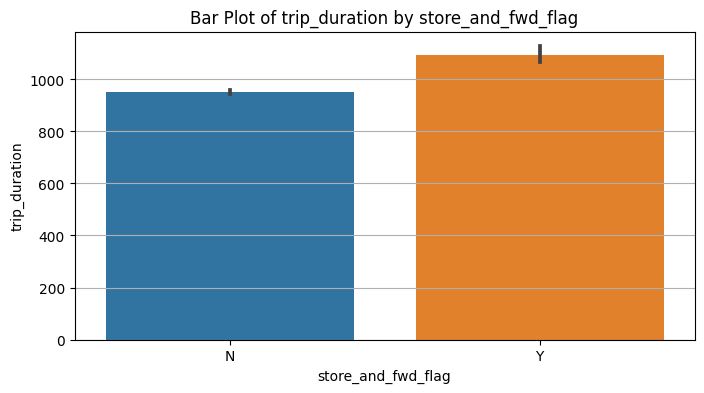

Trips with 'store_and_fwd_flag' set to 'Yes' seem to have slightly longer average durations compared to 'No.


In [57]:

# Bar Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='vendor_id', y='trip_duration')
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')
plt.title('Bar Plot of trip_duration by vendor_id')
plt.grid(axis='y')
plt.show()
print("Vendor 2 ('V2') appears to have slightly longer trip durations on average compared to Vendor 1 ('V1').")
# Vendor 2 ('V2') appears to have slightly longer trip durations on average compared to Vendor 1 ('V1').

# Bar Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='passenger_count', y='trip_duration')
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')
plt.title('Bar Plot of trip_duration by passenger_count')
plt.grid(axis='y')
plt.show()
print("Trips with 5 passengers seem to have the longest average duration, followed by 6 passengers.")
# Trips with 5 passengers seem to have the longest average duration, followed by 6 passengers.

# Bar Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='pickup_time_of_day', y='trip_duration')
plt.xlabel('pickup_time_of_day')
plt.ylabel('trip_duration')
plt.title('Bar Plot of trip_duration by pickup_time_of_day')
plt.grid(axis='y')
plt.show()
print("Trips during the afternoon hours tend to have longer average durations.")
# Trips during the afternoon hours tend to have longer average durations.

# Bar Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='store_and_fwd_flag', y='trip_duration')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')
plt.title('Bar Plot of trip_duration by store_and_fwd_flag')
plt.grid(axis='y')
plt.show()
print("Trips with 'store_and_fwd_flag' set to 'Yes' seem to have slightly longer average durations compared to 'No.")
# Trips with 'store_and_fwd_flag' set to 'Yes' seem to have slightly longer average durations compared to 'No.

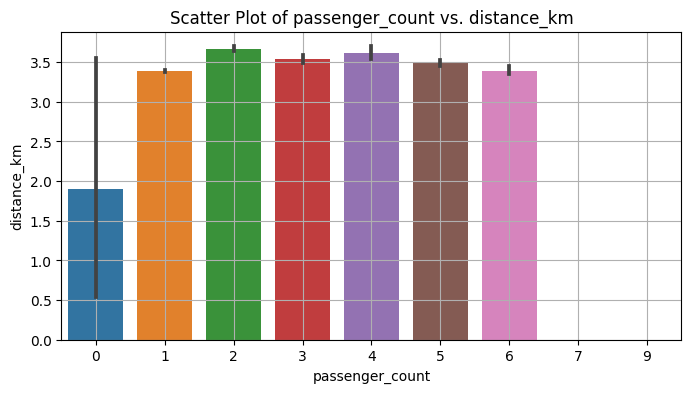

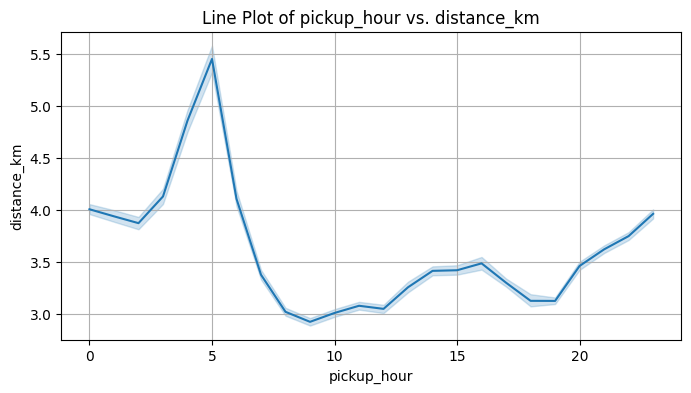

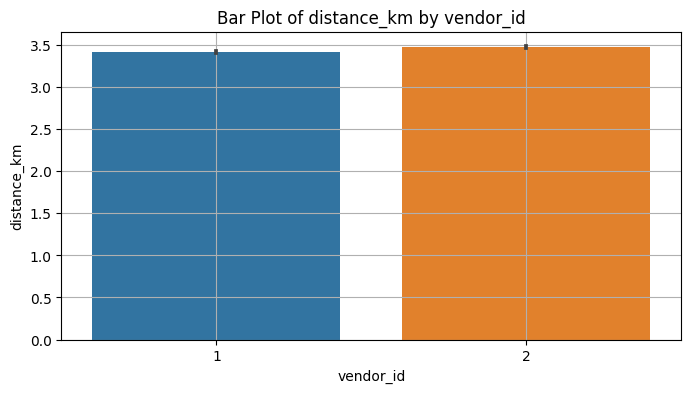

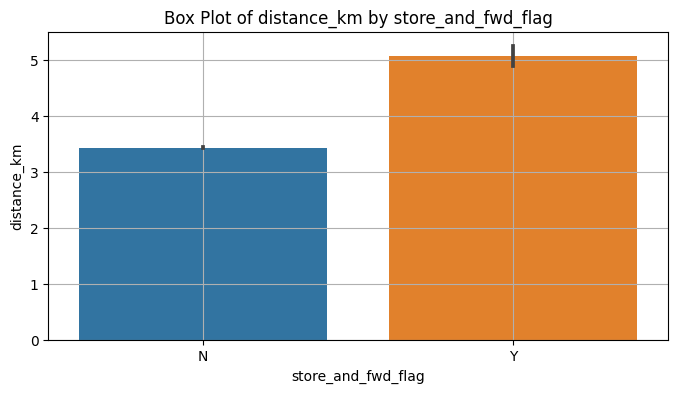

In [51]:

# Scatter Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='passenger_count', y='distance_km')
plt.xlabel('passenger_count')
plt.ylabel('distance_km')
plt.title('Scatter Plot of passenger_count vs. distance_km')
plt.grid(True)
plt.show()
# while trips with more passengers may cover longer distances.")
# It appears that trips with fewer passengers tend to have slightly shorter average distances,
# while trips with more passengers may cover longer distances.
# Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=data, x='pickup_hour', y='distance_km')
plt.xlabel('pickup_hour')
plt.ylabel('distance_km')
plt.title('Line Plot of pickup_hour vs. distance_km')
plt.grid(True)
plt.show()
# It appears that there might be some variations in the distance traveled based on the time of day
#there is peck hours, Early morning ( around 5:00)

# Bar Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='vendor_id', y='distance_km')
plt.xlabel('vendor_id')
plt.ylabel('distance_km')
plt.title('Bar Plot of distance_km by vendor_id')
plt.grid(True)
plt.show()
# Vendor 2 seems to have slightly longer average trip distances compared to Vendor 1.

# Box Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='store_and_fwd_flag', y='distance_km')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('distance_km')
plt.title('Box Plot of distance_km by store_and_fwd_flag')
plt.grid(True)
plt.show()
# Trips with 'store_and_fwd_flag' set to 'Yes' may have slightly longer distances on average.


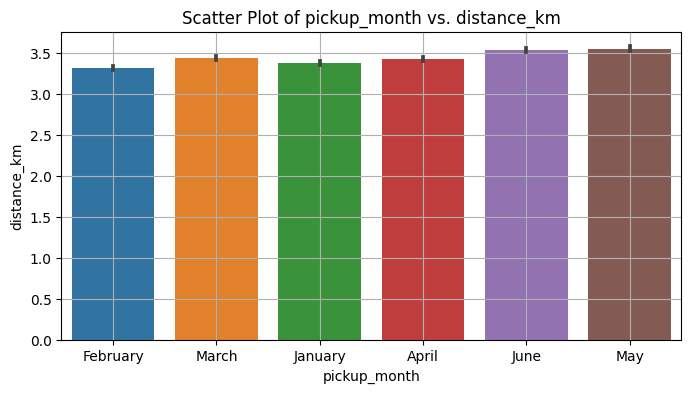

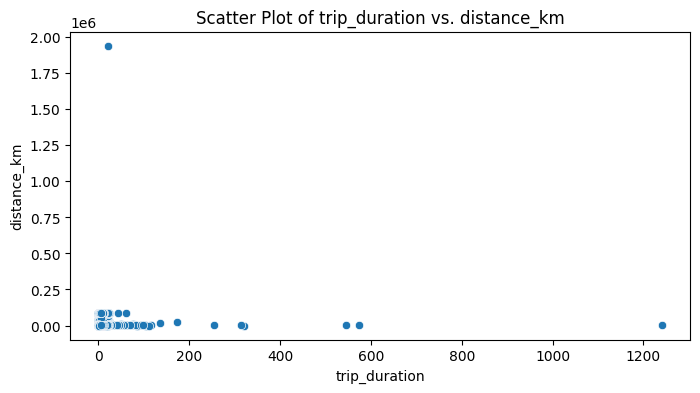

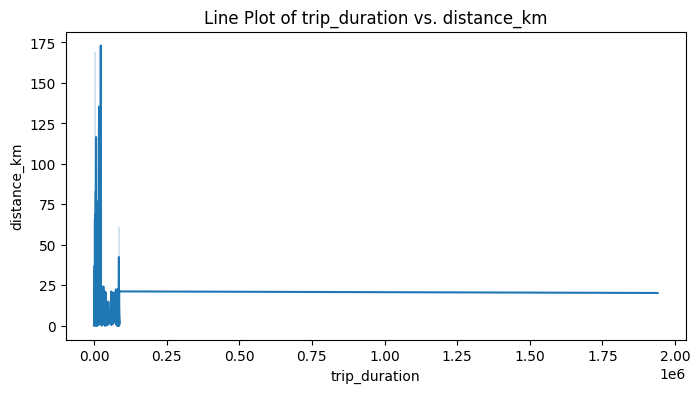

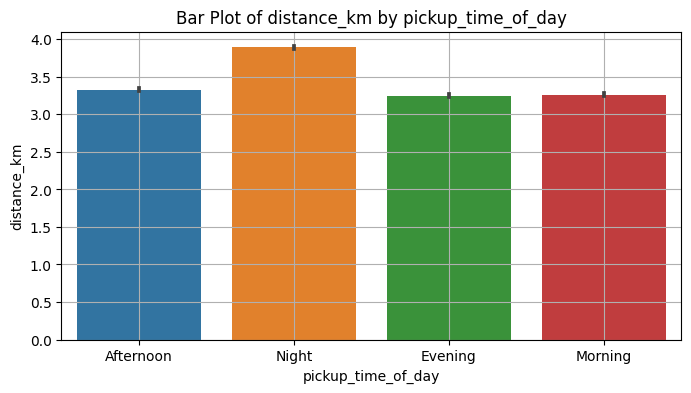

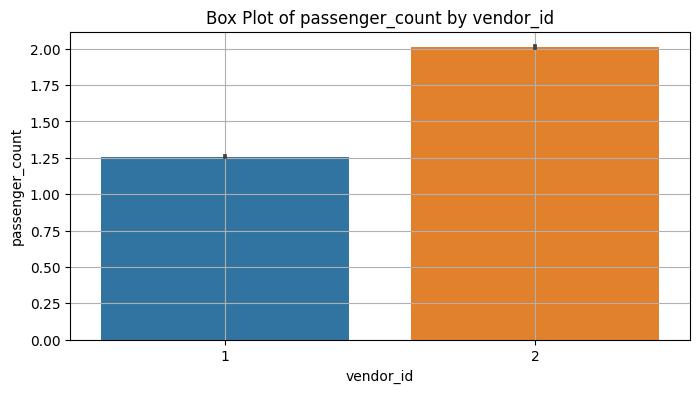

In [52]:

# Scatter Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='pickup_month', y='distance_km')
plt.xlabel('pickup_month')
plt.ylabel('distance_km')
plt.title('Scatter Plot of pickup_month vs. distance_km')
plt.grid(True)
plt.show()
# May and June have long trips


# Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='distance_km', y='trip_duration')
plt.xlabel('trip_duration')
plt.ylabel('distance_km')
plt.title('Scatter Plot of trip_duration vs. distance_km')
plt.show()


# Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=data, x='trip_duration', y='distance_km')
plt.xlabel('trip_duration')
plt.ylabel('distance_km')
plt.title('Line Plot of trip_duration vs. distance_km')
plt.show()
#


# Bar Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='pickup_time_of_day', y='distance_km')
plt.xlabel('pickup_time_of_day')
plt.ylabel('distance_km')
plt.title('Bar Plot of distance_km by pickup_time_of_day')
plt.grid(True)
plt.show()
# we have long trips during the Night


# Box Plot (Grouped)
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='vendor_id', y='passenger_count')
plt.xlabel('vendor_id')
plt.ylabel('passenger_count')
plt.title('Box Plot of passenger_count by vendor_id')
plt.grid(True)
plt.show()
# Vendor 2 has more passenger



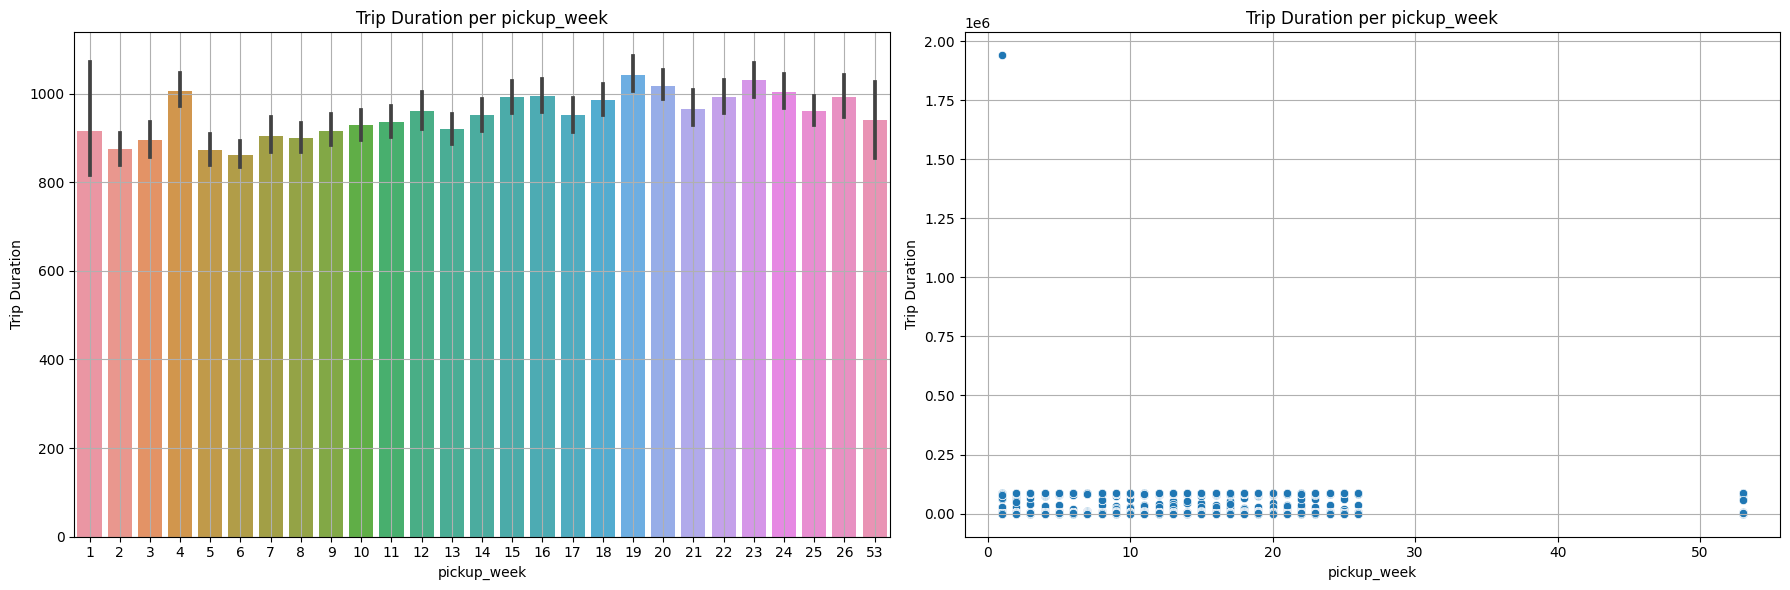

In [53]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.barplot(data=data, x='pickup_week', y='trip_duration')
plt.xlabel('pickup_week')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per pickup_week')
plt.grid(True)



# Subplot 2
plt.subplot(122)
sns.scatterplot(data=data, x='pickup_week', y='trip_duration')
plt.xlabel('pickup_week')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per pickup_week')
plt.grid(True)



plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()

#  week 19  have higher average trip durations compared to others.

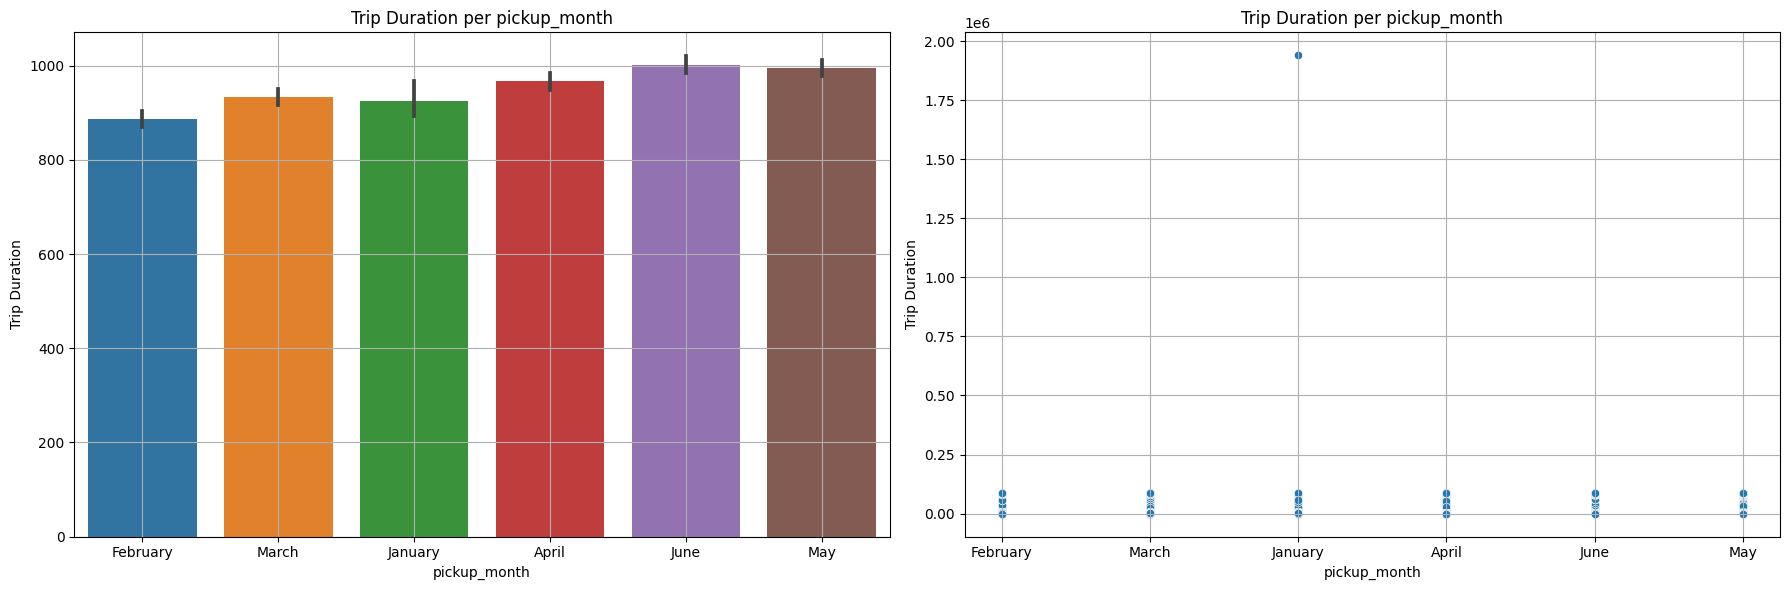

In [54]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.barplot(data=data, x='pickup_month', y='trip_duration')
plt.xlabel('pickup_month')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per pickup_month')
plt.grid(True)


# Subplot 2
plt.subplot(122)
sns.scatterplot(data=data, x='pickup_month', y='trip_duration')
plt.xlabel('pickup_month')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per pickup_month')
plt.grid(True)


plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()
#  months may and june have higher average trip durations compared to others.

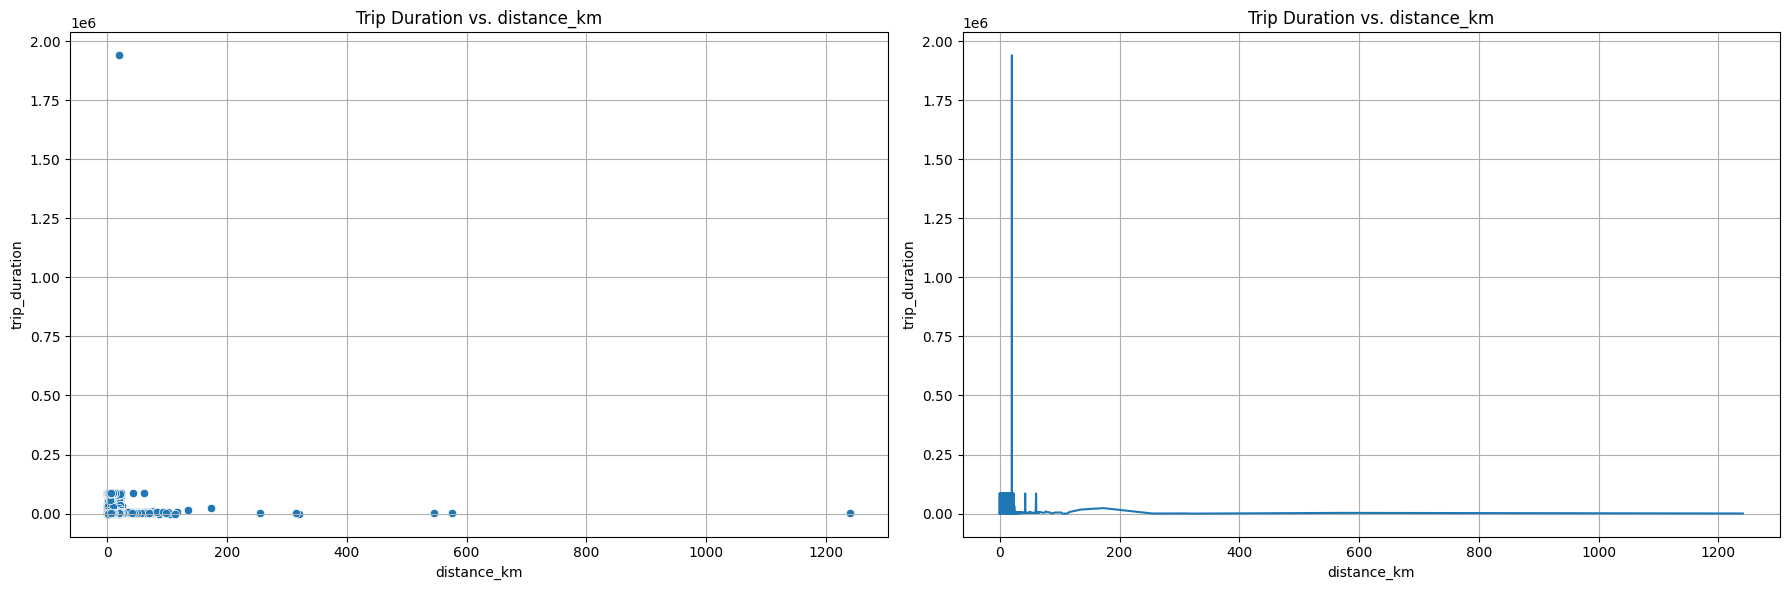

In [55]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(121)
sns.scatterplot(data=data, x='distance_km', y='trip_duration')
plt.xlabel('distance_km')
plt.ylabel('trip_duration')
plt.title('Trip Duration vs. distance_km')
plt.grid(True)
# It reveals a spread of data points, indicating that there is no strict linear relationship between trip duration and distance
# However, a general trend can be observed where as the distance increases, trip duration tends to increase, but with considerable variation.
# There are some outliers where trips cover long distances but have relatively short durations, and vice versa

# Subplot 2
plt.subplot(122)
sns.lineplot(data=data, x='distance_km', y='trip_duration')
plt.xlabel('distance_km')
plt.ylabel('trip_duration')
plt.title('Trip Duration vs. distance_km')
plt.grid(True)
# It demonstrates a clear trend where trip duration generally increases as the distance traveled increases.
# This suggests that longer distances are associated with longer trip durations.

plt.tight_layout()  # Adjust subplot spacing for a cleaner layout
plt.show()